In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qmmc.variables import *

In [4]:
n_samples, n_features = 1000, 5
w_real = np.random.randn(n_features)
b_real = np.random.randn()
X_real = 2 * (1. / 2 - np.random.rand(n_samples, n_features))
y_real = b_real + X_real.dot(w_real) + 0.1 * np.random.randn(n_samples)

In [5]:
if n_features == 1:
    plt.figure(figsize=(15, 5))
    plt.plot(X_real, y_real, 'x')
    plt.plot(X_real, b_real + X_real.dot(w_real), color='r')
    plt.title(r"Linear regression ($w$ = %s, $b$ = %s)" % (w_real, b_real))

In [6]:
mu_0, sigma_0 = Value(0), Value(1)

X = Value(X_real)
w = Normal(mu_0, sigma_0, size=n_features, name='w')
b = Normal(mu_0, sigma_0, name='b')

@Function
def Xdotw(w=w, X=X, b=b):
    return b + X.dot(w)

y = Normal(Xdotw, Value(.1), value=y_real, observed=True, name='y')

In [7]:
model = Model([y, Xdotw, b, w])

In [8]:
print w_real
print w.value

[ 0.90846073 -0.21238976 -0.9846277   1.34887747  0.51888539]
[ 0.75091699 -0.44048686 -0.25467832  1.04268231  2.29258486]


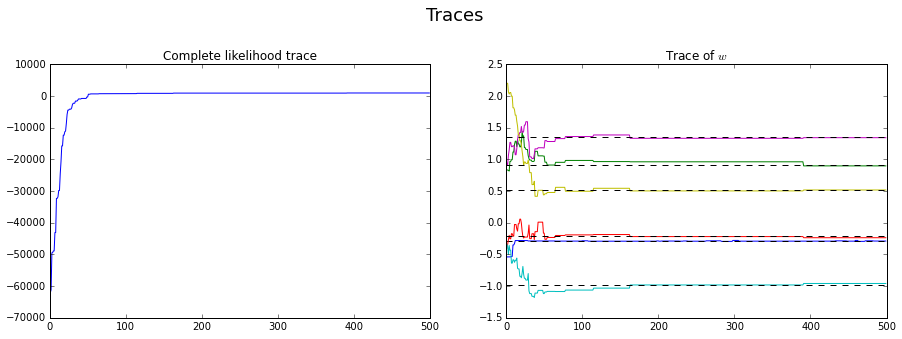

In [9]:
model.estimate(500)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model.logp_history)
plt.title("Complete likelihood trace")

plt.subplot(2, 2, 2)
plt.plot(model.samplers['b'].get_history())
plt.axhline(b_real, color='black', linestyle='--')
plt.plot(model.samplers['w'].get_history())
for wr in w_real:
    plt.axhline(wr, color='black', linestyle='--')
plt.title(r"Trace of $w$")

plt.suptitle(r"Traces", size=18)
plt.show()